<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Alvo-NOVO" data-toc-modified-id="Alvo-NOVO-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Alvo NOVO</a></span></li><li><span><a href="#Teste-Maio-2017" data-toc-modified-id="Teste-Maio-2017-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Teste Maio 2017</a></span></li><li><span><a href="#Teste-Junho-2017" data-toc-modified-id="Teste-Junho-2017-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Teste Junho 2017</a></span></li><li><span><a href="#Teste-Julho-2017" data-toc-modified-id="Teste-Julho-2017-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Teste Julho 2017</a></span></li></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2

# O arquivo core.py está na raiz desse projeto. Por isso, precisamos carregar o path para poder importá-lo.
import sys
sys.path.insert(0, 'Z:/Victor/projeto_aprovacao_venda/notebooks')
from core import * # split_base, find_optimal_cutoff, debtor_distribution, create_distribution_plot, create_distribution_plot_5_by_5

import numpy as np
import pandas as pd
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')
%matplotlib inline

from sklearn.ensemble import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.utils.class_weight import compute_sample_weight


# Teste Julho 2017

C:\Users\victor.valente.BEMOL\AppData\Local\Continuum\anaconda2\envs\py3\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Training...

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.2956           0.0879            9.88s
         2           1.2653           0.0268            9.31s
         3           1.2501           0.0153            8.59s
         4           1.2415           0.0055            7.88s
         5           1.2373           0.0062            7.41s
         6           1.2325           0.0042            6.74s
         7           1.2292           0.0024            6.22s
         8           1.2243           0.0027            5.79s
         9           1.2207           0.0016            5.36s
        10           1.2194           0.0007            4.87s
        11           1.2159           0.0029            4.43s
        12           1.2131           0.0006            3.94s
        13           1.2088          -0.0006            3.43s
        14           1.2093          -0.0000            2.97s
        15           1.2067           0.0016            

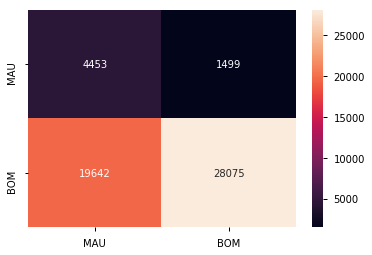

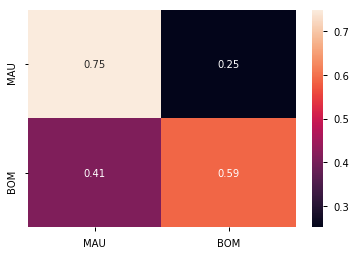

classification_report:

             precision    recall  f1-score   support

          0       0.18      0.75      0.30      5952
          1       0.95      0.59      0.73     47717

avg / total       0.86      0.61      0.68     53669

ROC AUC :  0.6682583077315608
53669 clients, (11.09 % debtors)
score range	debtors(%)	frequency(%)
  0 -   5	     47.37	        0.07	0.00
  5 -  10	     34.41	        0.87	0.01
 10 -  15	     30.42	        2.47	0.03
 15 -  20	     29.81	        3.91	0.07
 20 -  25	     23.29	        5.12	0.12
 25 -  30	     19.28	        5.63	0.18
 30 -  35	     17.18	        6.34	0.24
 35 -  40	     15.52	        6.95	0.31
 40 -  45	     11.54	        6.91	0.38
 45 -  50	     12.14	        6.61	0.45
 50 -  55	      9.12	        7.25	0.52
 55 -  60	      8.68	        6.61	0.59
 60 -  65	      6.87	        6.73	0.65
 65 -  70	      4.99	        6.49	0.72
 70 -  75	      4.16	        6.18	0.78
 75 -  80	      3.73	        5.54	0.84
 80 -  85	      3.35	        5.84	0.90

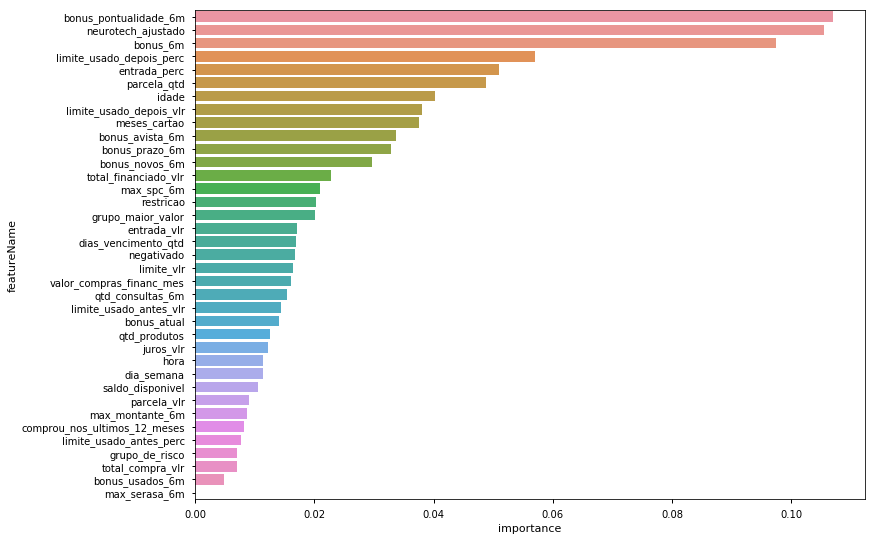

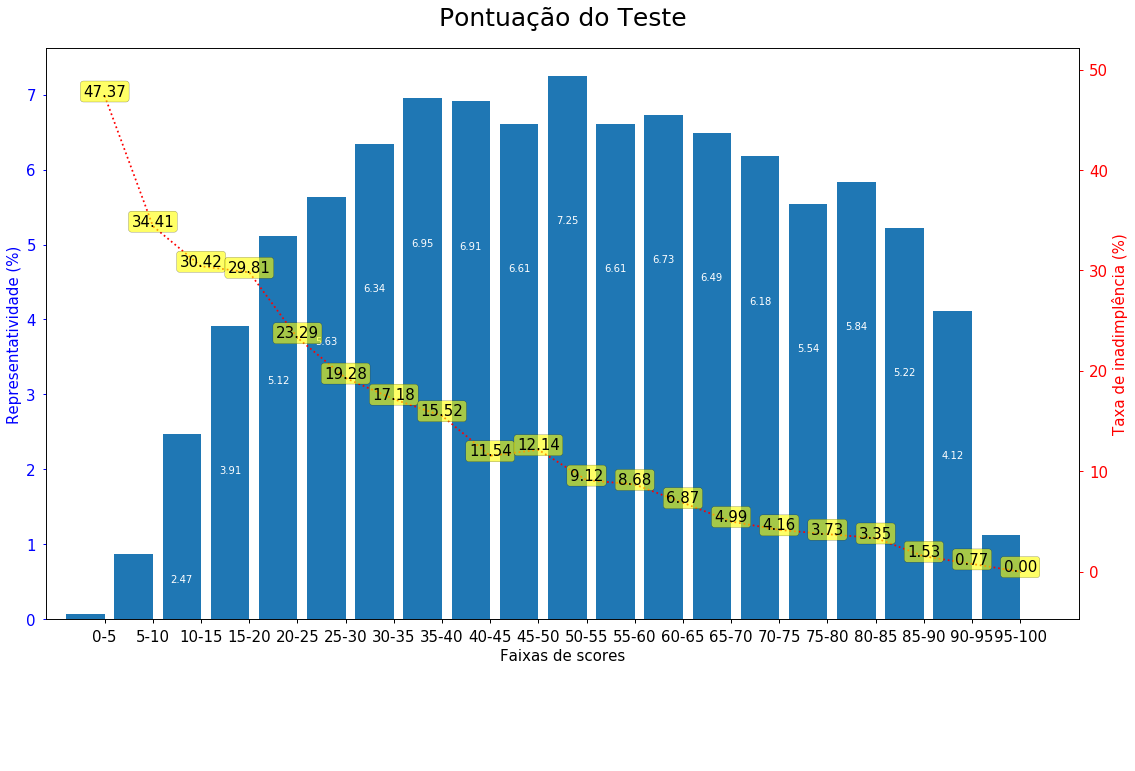

In [2]:
variaveis_removidas = [
    'compras_financ_no_mes_qtd',
    'desconto_vlr',
    'dia_mes',
    'entrada_min_perc',
    'juros_perc',
    'limite_extrapolado_vlr',
    'maior_compra_bonus_6m',
    'nota_fiscal_qtd',
    'nota_fiscal_vlr',
    'check_seguro'
]

usecols_reduzido = [
    'data', 'target', 'saldo_devedor_vlr', 'bonus_6m', 'bonus_atual', 'bonus_avista_6m', 'bonus_novos_6m', 'bonus_pontualidade_6m',
    'bonus_prazo_6m', 'bonus_usados_6m',
    'dia_semana', 'dias_vencimento_qtd', 'entrada_perc', 'entrada_vlr', 'hora', 'idade', 'juros_vlr', 'limite_usado_antes_perc', 'limite_usado_antes_vlr',
    'limite_usado_depois_perc', 'limite_usado_depois_vlr', 'limite_vlr',
    'max_montante_6m', 'max_spc_6m', 'max_serasa_6m', 'meses_cartao', 'negativado', 'parcela_qtd', 'parcela_vlr', 'qtd_consultas_6m', 'restricao',
    'saldo_disponivel', 'total_compra_vlr', 'total_financiado_vlr', 'valor_compras_financ_mes', 
    'comprou_nos_ultimos_12_meses', 'neurotech_ajustado', 'grupo_maior_valor', 'grupo_de_risco', 'qtd_produtos'
]

# Carregar bases de treino e teste
base_aprovacao_automatica = pd.read_csv('C:/Victor/base_aprovacao_automatica_2015_09_a_2017_07.csv', sep=',', parse_dates=['data'], usecols=usecols_reduzido)

# Alvo NOVO

# Carregar novo alvo
base_aprovacao_automatica.target = (base_aprovacao_automatica.total_compra_vlr * 0.15) - base_aprovacao_automatica.saldo_devedor_vlr
base_aprovacao_automatica.target = base_aprovacao_automatica.target.apply(lambda x: 1 if x >= 0 else 0)

# Teste Julho 2017

# Definir períodos de treino e teste
data_fim_treino = pd.to_datetime('10/2016') + pd.offsets.MonthEnd(0)

data_inicio_teste = pd.to_datetime('7/2017')
data_fim_teste = data_inicio_teste + pd.offsets.MonthEnd(0)

# Split treino-teste
base_treino = base_aprovacao_automatica[base_aprovacao_automatica.data <= data_fim_treino].copy()
base_teste = base_aprovacao_automatica[base_aprovacao_automatica.data.between(data_inicio_teste, data_fim_teste)]

variaveis_para_remover = ['data', 'saldo_devedor_vlr']
base_treino.drop(labels = variaveis_para_remover, axis=1, inplace=True, errors='ignore')
base_teste.drop(labels = variaveis_para_remover, axis=1, inplace=True, errors='ignore')

base_treino.reset_index(inplace = True, drop=True)
base_teste.reset_index(inplace = True, drop=True)
X_treino, X_teste = base_treino.drop('target', 1), base_teste.drop('target', 1)
y_treino, y_teste = base_treino.target, base_teste.target

# del base_treino, base_teste
assert y_treino.nunique() == 2 and y_teste.nunique() == 2 and X_treino.shape[1] == X_teste.shape[1]

# Train
print('Training...\n')

gb = GradientBoostingClassifier(learning_rate=1., n_estimators=20, subsample=.8, min_weight_fraction_leaf=0.01, max_features=1., random_state=42, verbose=2).fit(X_treino, y_treino, sample_weight=compute_sample_weight(class_weight='balanced', y=y_treino))

# Predict

# get predictions on test data
predictions = gb.predict(X_teste)

# Set prediciton threshold
y_pred = pd.DataFrame(predictions)[0].apply(lambda x: 0 if (x < 0.5) else 1, 1)

# Prediction analysis
cm = confusion_matrix(y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['MAU', 'BOM'], yticklabels=['MAU', 'BOM'])
plt.show()

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=['MAU', 'BOM'], yticklabels=['MAU', 'BOM'])
plt.show()

print("classification_report:\n")
print(classification_report(y_teste, y_pred))

gbmMetrics = pd.concat([pd.Series(X_treino.columns), pd.Series(gb.feature_importances_)], axis=1)
gbmMetrics.columns = ['featureName', 'importance']
metrics_sorted = gbmMetrics.sort_values('importance', ascending=False)

g = sns.barplot(x="importance", y="featureName", data=metrics_sorted)
g.figure.set_size_inches(12, 9)

print("ROC AUC : ", roc_auc_score(y_teste, predictions))

from core import debtor_distribution, create_distribution_plot

scores = pd.DataFrame(gb.predict_proba(X_teste))[1]

y_teste = y_teste.reset_index(drop=True)
scores = scores.reset_index(drop=True)

importance_list, noncomplice_rate_list_sem_idf = debtor_distribution_5_by_5(scores, y_teste)
create_distribution_plot_5_by_5(importance_list, noncomplice_rate_list_sem_idf)

In [14]:
def calculate_risk(X, y, model):
    # Calcular scores do dataset usando modelo específico.
    dataset = X.join(y)
    scores = model.predict_proba(dataset.drop('target', 1))
    dataset['score'] = scores[:, -1]
    
    grouped_by_score = dataset.groupby(dataset['score'].apply(lambda x: int(round(x, 2) * 100)))['target'].agg(['sum', 'count'])
    grouped_by_score.rename(index=str, columns={"sum": "qtd_adimplentes", "count": "qtd_clientes"}, inplace=True)
    grouped_by_score.index = map((lambda x: float(x) / 100), grouped_by_score.index.values)
    grouped_by_score['risco'] = round(1 - pd.to_numeric(grouped_by_score['qtd_adimplentes']) / grouped_by_score['qtd_clientes'], 2)
    
    new_index = np.arange(0., 1.01, 0.01)
    grouped_by_score = grouped_by_score.reindex(new_index).interpolate()
    grouped_by_score.index = grouped_by_score.index.map(lambda x: round(x,2))
    
    ####
    grouped_by_score['acumulado_crescente'] = pd.to_numeric(grouped_by_score['qtd_clientes'])
    grouped_by_score['acumulado_crescente_absoluto'] = grouped_by_score['acumulado_crescente'].cumsum()
    grouped_by_score['acumulado_crescente'] = round(grouped_by_score['acumulado_crescente'].cumsum() / grouped_by_score['qtd_clientes'].sum(), 2)
    grouped_by_score['acumulado_decrescente'] = 1 - grouped_by_score['acumulado_crescente']
    ####
    
    grouped_by_score['risco_interpolado'] = grouped_by_score['risco'].rolling(10, center=True).mean()
    grouped_by_score.risco_interpolado.iloc[0:15] = grouped_by_score.risco.iloc[0:15].max()
    grouped_by_score.risco_interpolado.iloc[-5:] = grouped_by_score.risco.iloc[-5:].mean()
    grouped_by_score.risco_interpolado = grouped_by_score.risco_interpolado.apply(lambda x: round(x,2))
    return grouped_by_score[['risco', 'risco_interpolado', 'acumulado_crescente', 'acumulado_decrescente', 'qtd_adimplentes', 'qtd_clientes', 'acumulado_crescente_absoluto']]

hash_score_risco = calculate_risk(X_teste, y_teste, gb)

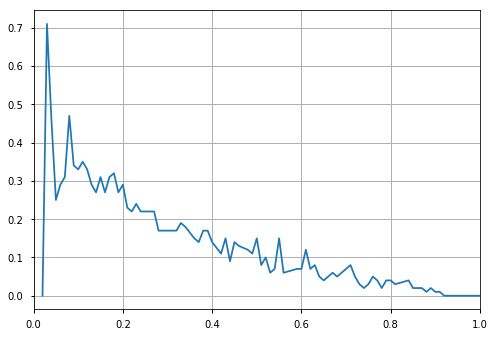

In [16]:
hash_score_risco['risco'].plot(grid=True)

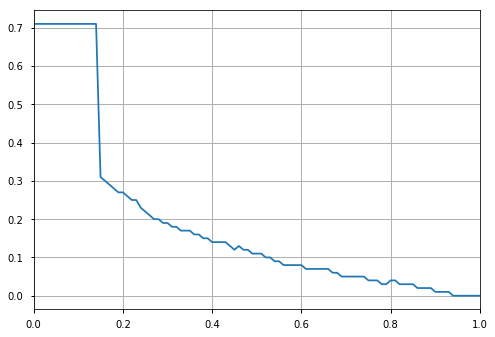

In [17]:
hash_score_risco['risco_interpolado'].plot(grid=True)

In [15]:
hash_score_risco

,risco,risco_interpolado,acumulado_crescente,acumulado_decrescente,qtd_adimplentes,qtd_clientes,acumulado_crescente_absoluto
0.00,NaN,0.71,NaN,NaN,NaN,NaN,NaN
0.01,NaN,0.71,NaN,NaN,NaN,NaN,NaN
0.02,0.000000,0.71,0.00,1.00,5.000000,5.000000,5.000000
0.03,0.710000,0.71,0.00,1.00,2.000000,7.000000,12.000000
0.04,0.460000,0.71,0.00,1.00,13.000000,24.000000,36.000000
0.05,0.250000,0.71,0.00,1.00,9.000000,12.000000,48.000000
0.06,0.290000,0.71,0.00,1.00,36.000000,51.000000,99.000000
0.07,0.310000,0.71,0.00,1.00,51.000000,74.000000,173.000000
0.08,0.470000,0.71,0.00,1.00,50.000000,94.000000,267.000000
0.09,0.340000,0.71,0.01,0.99,101.000000,154.000000,421.000000


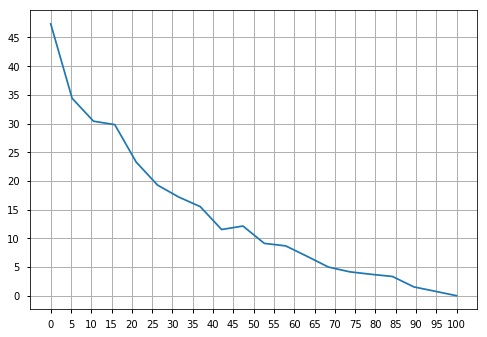

In [38]:
media_do_modelo = plt.plot(np.linspace(0, 100, 20), noncomplice_rate_list_sem_idf)
plt.xticks(np.arange(0, 101, step=5))
plt.yticks(np.arange(0, 50, step=5))
plt.grid(True)

In [18]:
h = hash_score_risco['risco_interpolado']
h.to_dict()

t = (gb, h)
import pickle
with open('modelo_gb_v1.1_pkl.pkl', 'wb') as gb_pkl:
    pickle.dump(t, gb_pkl)